# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [35]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np

In [37]:
# Parameter-paramater yang digunakan.
kecepatan_pembelajaran = 0.01
langkah_pelatihan = 5000
tampilkan_langkah = 50

In [38]:
# Data Latih yang digunakan.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [39]:
# Bobot dan Bias, diinisialisasi secara acak.
rng = np.random
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Regresi linier (Wx + b).
def Regresi_Linier(x):
    return W * x + b

# Mean square error (MSE).
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Mean Absolute Percentage Error (MAPE).
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Pengoptimal Penurunan Gradien Stochastic.
optimizer = tf.optimizers.SGD(kecepatan_pembelajaran)

In [40]:
# Fungsi untuk Proses pengoptimalan. 
from math import sqrt
def run_optimization():
    # Bungkus komputasi di dalam GradientTape untuk diferensiasi otomatis.
    with tf.GradientTape() as g:
        pred = Regresi_Linier(X)
        mse  = mean_square(pred, Y)
        rmse = sqrt(mse)
        MAPE = mean_absolute_percentage_error(Y, pred)
        Persentase_keberhasilan = 100-MAPE

    # Hitung gradien.
    gradients = g.gradient(mse, [W, b])
    
    # Perbarui W dan b menggunakan gradien berikut.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [41]:
# Jalankan pelatihan untuk sejumlah langkah tertentu.
for langkah in range(1, langkah_pelatihan + 1):
    # Jalankan pengoptimalan untuk memperbarui nilai W dan b.
    run_optimization()
    
    if langkah % tampilkan_langkah == 0:
        pred = Regresi_Linier(X)
        mse = mean_square(pred, Y)
        rmse = sqrt(mse)
        MAPE = mean_absolute_percentage_error(Y, pred)
        Persentase_keberhasilan = 100-MAPE
        
        print("langkah: %i, mse: %f, rmse: %f, MAPE: %f, Persentase_keberhasilan: %f, W: %f, b: %f" % (langkah, mse, rmse,MAPE,Persentase_keberhasilan, W.numpy(), b.numpy()))

langkah: 50, mse: 0.926539, rmse: 0.962569, MAPE: 41.027832, Persentase_keberhasilan: 58.972168, W: 0.604026, b: -1.699493
langkah: 100, mse: 0.759813, rmse: 0.871673, MAPE: 36.733757, Persentase_keberhasilan: 63.266243, W: 0.563700, b: -1.413599
langkah: 150, mse: 0.629062, rmse: 0.793134, MAPE: 32.931072, Persentase_keberhasilan: 67.068928, W: 0.527988, b: -1.160421
langkah: 200, mse: 0.526524, rmse: 0.725620, MAPE: 29.926933, Persentase_keberhasilan: 70.073067, W: 0.496364, b: -0.936216
langkah: 250, mse: 0.446112, rmse: 0.667916, MAPE: 27.299526, Persentase_keberhasilan: 72.700474, W: 0.468358, b: -0.737667
langkah: 300, mse: 0.383050, rmse: 0.618911, MAPE: 24.972788, Persentase_keberhasilan: 75.027212, W: 0.443557, b: -0.561840
langkah: 350, mse: 0.333596, rmse: 0.577578, MAPE: 22.912310, Persentase_keberhasilan: 77.087690, W: 0.421594, b: -0.406134
langkah: 400, mse: 0.294813, rmse: 0.542967, MAPE: 21.087627, Persentase_keberhasilan: 78.912373, W: 0.402145, b: -0.268246
langkah: 

langkah: 3450, mse: 0.153858, rmse: 0.392247, MAPE: 13.998573, Persentase_keberhasilan: 86.001427, W: 0.251726, b: 0.798157
langkah: 3500, mse: 0.153858, rmse: 0.392247, MAPE: 13.998920, Persentase_keberhasilan: 86.001080, W: 0.251715, b: 0.798231
langkah: 3550, mse: 0.153858, rmse: 0.392247, MAPE: 13.999228, Persentase_keberhasilan: 86.000772, W: 0.251706, b: 0.798296
langkah: 3600, mse: 0.153858, rmse: 0.392247, MAPE: 13.999504, Persentase_keberhasilan: 86.000496, W: 0.251698, b: 0.798354
langkah: 3650, mse: 0.153858, rmse: 0.392247, MAPE: 13.999746, Persentase_keberhasilan: 86.000254, W: 0.251691, b: 0.798405
langkah: 3700, mse: 0.153858, rmse: 0.392247, MAPE: 13.999961, Persentase_keberhasilan: 86.000039, W: 0.251684, b: 0.798451
langkah: 3750, mse: 0.153858, rmse: 0.392247, MAPE: 14.000152, Persentase_keberhasilan: 85.999848, W: 0.251679, b: 0.798491
langkah: 3800, mse: 0.153858, rmse: 0.392247, MAPE: 14.000319, Persentase_keberhasilan: 85.999681, W: 0.251674, b: 0.798526
langkah:

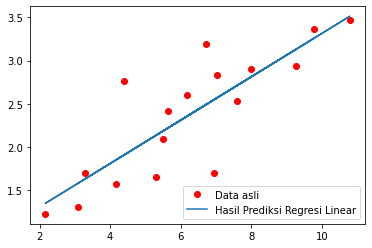

In [45]:
# Tampilan grafis
import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro', label='Data asli')
plt.plot(X, np.array(W * X + b), label='Hasil Prediksi Regresi Linear')
plt.legend()
plt.show()